# **Scaling e Normalization**

La differenza tra le due è che:


*   **Scaling:** porta tutti i valori all'interno di un range
*   **Normalization:** modifica la distribuzione dei dati

In [ ]:
%pip install scipy
from scipy import stats
%pip install mlxtend
from mlxtend.preprocessing import minmax_scaling
%pip install seaborn
import seaborn as sns
%pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [6]:
import pandas as pd
dataset1 = pd.read_csv('winemag-data-130k-v2.csv',index_col=0)

In [7]:
# Esempio per riempire colonne categoriche (cioè che contengono stringhe)
dfnan = dataset1.copy()

# Calcolo il numero di righe che ha valore NaN nella colonna 'country'
n_rows = dfnan[dfnan.country.isnull()].shape[0]
# Ottenere gli indici delle righe che hanno valore NaN nella colonna 'country'
nan_indices = dfnan.loc[dfnan.country.isnull()].index
# Calcolo della moda della colonna 'country'
mode_country = dfnan.country.mode()[0]
# Sostituire ai valori NaN la moda trovata
df_filled = dfnan.fillna({'country':mode_country})

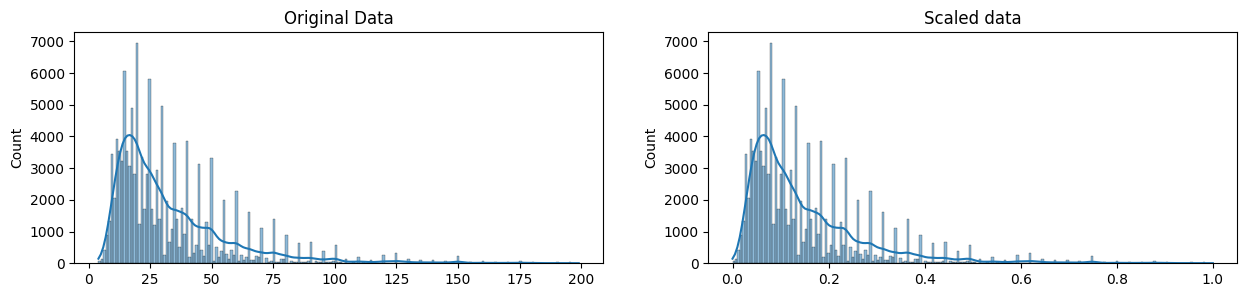

In [8]:
# Esempio di scaling
# Otteniamo i valori che vogliamo che siano scalati
ydsnet = np.array(df_filled.loc[df_filled.price < 200].price)
# Scaliamo i dati nel range [0,1]
scaled_data = minmax_scaling(ydsnet, columns=[0])

# Plotting del risultato
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(ydsnet, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

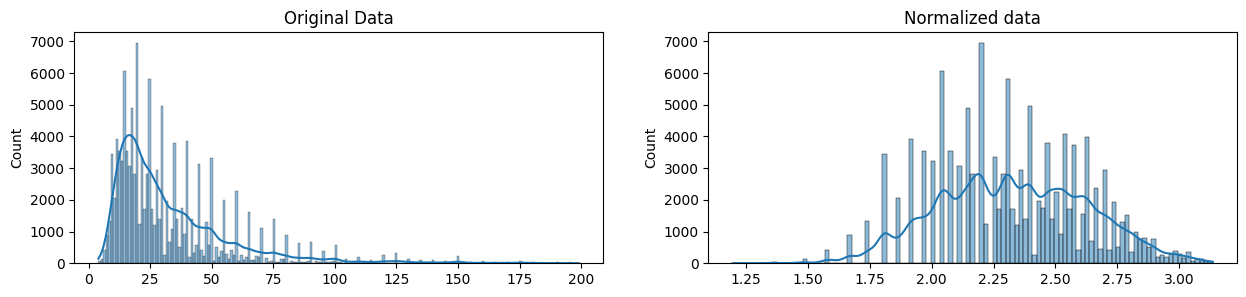

In [9]:
# Esempio di normalizzazione
# Otteniamo i valori che vogliamo normalizzare
ydsnet = np.array(df_filled.loc[df_filled.price < 200].price)
# Normalizzazione dei dati
normalized_data = stats.boxcox(ydsnet)

# Plotting del risultato
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(ydsnet, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

# Gestione delle date

In [ ]:
import pandas as pd

# Inseriamo delle date per vedere come gestirle
dates = pd.Series(['2023-05-23','2022-05-20','2021-02-24'])

# Parsing delle date, da stringhe a datetime
date_parsed = pd.to_datetime(dates)

# Cambio del formato delle date
date_parsed = date_parsed.dt.strftime('%d/%m/%Y')
print(date_parsed)

data = pd.to_datetime(dates)
# Ottenimento dei giorni
data_days = data.dt.day
# Ottenimento dei mesi
data_months = data.dt.month
# Ottenimento degli anni
data_years = data.dt.year

print(data_days)
print(data_months)
print(data_years)